<a href="https://colab.research.google.com/github/DiegowAngel/-Extraccion-de-caracteristicas/blob/main/Extraccion_de_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install funpymodeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
from google.colab import files
files.upload()

In [5]:
pd.options.display.max_columns= None

In [ ]:
Mc_Retailer = pd.read_excel('microretailer_mit_lift_lab.xlsx')
Mc_Retailer

In [ ]:
v_n=Mc_Retailer.isnull().sum()
v_n

In [ ]:
# Este nuevo espacio de memoria almacena 20 variables que yo seleccioné de la base de datos
Mc_20 = Mc_Retailer.loc[:, ["_updated_by","2_current_permanent_employees","49_inventory_records","157_frequency_organize_shelves","232_type_of_store","163_number_high_perishable_products",
                            "18_sales_records","186_internet_connection","189_payment_methods","214_customer_relationship_tools","193_sales_planning_tools",
                            "279_changes_procurement_pandemic","60_services","210_sales_channels","145_number_direct_competitors","6_change_employees_average_salary_last_year",
                            "5_change_store_space_last_year","4_number_permanent_employees_last_year","277_payment_method_suppliers","161_actions_stockouts"]] # Selecte multiple columns
Mc_20


In [ ]:
#Aquí voy a visualizar el tipo de variables que estoy manejando
Mc_20.info()

In [ ]:
#Busco valores nulos
v_n=Mc_20.isnull().sum()
v_n
# Me doy cuenta de que los datos están bien incompletos

In [145]:
# Aplicación de métodos de sustitución
#1
#Asumo que en caso de no haber respondido solo puede haber un empleado permanente
Mc_20["2_current_permanent_employees"]=Mc_20["2_current_permanent_employees"].fillna(1)
#2
#Asumo que en caso de no haber respondido es porque no hacen inventarios
Mc_20["49_inventory_records"]=Mc_20["49_inventory_records"].fillna("No lo hago")
#3
#Asumo que en caso de no haber respondido es porque no hacen inventarios
Mc_20["49_inventory_records"]=Mc_20["49_inventory_records"].fillna("No lo hago")
#4
#Asumo que en caso de no haber respondido es porque la frecuencia es semanal
Mc_20["157_frequency_organize_shelves"]=Mc_20["157_frequency_organize_shelves"].fillna("Semanalmente")
#5
#Asumo que se puede sustiuir por un 0 (equivalente a ninguno)
Mc_20["163_number_high_perishable_products"]=Mc_20["163_number_high_perishable_products"].fillna(0)
#6
#Asumo que en caso de no haber respondido se hace en papel
Mc_20["18_sales_records"]=Mc_20["18_sales_records"].fillna("En papel")
#7
#Asumo que en caso de no haber respondido es porque no hay internet
Mc_20["186_internet_connection"]=Mc_20["186_internet_connection"].fillna("no")
#8
#Asumo que en caso de no haber respondido es porque solamente aceptan efectivo
Mc_20["189_payment_methods"]=Mc_20["189_payment_methods"].fillna("Efectivo")
#9
#Asumo que en caso de no haber respondido es porque no hay ningún método de relación con el cliente
Mc_20["214_customer_relationship_tools"]=Mc_20["214_customer_relationship_tools"].fillna("Ninguna")
#10
#Asumo que en caso de no haber respondido, no hay métodos de planeación de ventas
Mc_20["193_sales_planning_tools"]=Mc_20["193_sales_planning_tools"].fillna("Ninguna")
#11
#Asumo que en caso de no haber respondido es porque no hubo cambios
Mc_20["279_changes_procurement_pandemic"]=Mc_20["157_frequency_organize_shelves"].fillna("Ninguna de las anteriores")
#12
#Asumo que en caso de no haber respondido es porque no hay ningún servicio
Mc_20["60_services"]=Mc_20["60_services"].fillna("Ninguno")
#13
#Asumo que en caso de no haber respondido es porque solo tienen llamadas a teléfono celular (promedio)
Mc_20["210_sales_channels"]=Mc_20["210_sales_channels"].fillna("Llamada a Teléfono celular")
#14
#Asumo que en este caso es mejor sustituir por un 0
Mc_20["145_number_direct_competitors"]=Mc_20["145_number_direct_competitors"].fillna(0)
#15
#Asumo que en caso de no haber respondido es porque el salario no ha cambiado
Mc_20["6_change_employees_average_salary_last_year"]=Mc_20["6_change_employees_average_salary_last_year"].fillna("No cambió")
#16
#Asumo que en caso de no haber respondido es porque no cambió el espacio en la tienda
Mc_20["5_change_store_space_last_year"]=Mc_20["5_change_store_space_last_year"].fillna("No cambió")
#17
#Solo para variar un poco los métodos de sustitución, voy a ocupar el FFill
Mc_20["4_number_permanent_employees_last_year"]=Mc_20["4_number_permanent_employees_last_year"].fillna(method="ffill")
#18
#Asumo que en caso de no haber respondido es debido a que solamente pagan en efectivo
Mc_20["277_payment_method_suppliers"]=Mc_20["277_payment_method_suppliers"].fillna("Efectivo")
#19
#Asumo que en caso de no haber respondido es debido a que solamente pagan en efectivo
Mc_20["161_actions_stockouts"]=Mc_20["161_actions_stockouts"].fillna("Perder la venta")

<ipython-input-145-04c0eccea702>:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mc_20["4_number_permanent_employees_last_year"]=Mc_20["4_number_permanent_employees_last_year"].fillna(method="ffill")


In [25]:
v_n=Mc_20.isnull().sum()
v_n
#Corroboro que no haya valores nulos

_updated_by                                    0
2_current_permanent_employees                  0
49_inventory_records                           0
157_frequency_organize_shelves                 0
232_type_of_store                              0
163_number_high_perishable_products            0
18_sales_records                               0
186_internet_connection                        0
189_payment_methods                            0
214_customer_relationship_tools                0
193_sales_planning_tools                       0
279_changes_procurement_pandemic               0
60_services                                    0
210_sales_channels                             0
145_number_direct_competitors                  0
6_change_employees_average_salary_last_year    0
5_change_store_space_last_year                 0
4_number_permanent_employees_last_year         0
277_payment_method_suppliers                   0
161_actions_stockouts                          0
dtype: int64

In [ ]:
#Filtro para obtener variables cuantitativas
cuant = Mc_20.iloc[ : , [1,5,14,17]]
cuant

In [ ]:
#Filtro para obtener variables cualitativas
cuali = Mc_20.iloc[ : , [0,2,3,4,6,7,8,9,10,11,12,13,15,16,18,19]]
cuali

In [ ]:
# Hacemos las gráficas de bigotes
fig = plt.figure(figsize =(18, 15))
cuant.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
# Aplicamos Desviación Estándar
y= cuant
Lim_Sup= y.mean() + 1*y.std()
Lim_Inf= y.mean() - 1*y.std()
print("Limite superior permitido", Lim_Sup)
print("Limite inferior permitido", Lim_Inf)

# Obtenemos datos sin outliers
Data_sin_Outliers = cuant[(y<=Lim_Sup)&(y>=Lim_Inf)]
Data_sin_Outliers=Data_sin_Outliers.fillna(round(Data_sin_Outliers.mean(),1))

In [ ]:
# Graficamos una última vez
fig = plt.figure(figsize =(18, 15))
Data_sin_Outliers.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [151]:
#Al fin tenemos la información limpiada, sin NANS, y sin outliers
dt_F = pd.concat([cuali, Data_sin_Outliers], axis=1)
dt_F

,_updated_by,49_inventory_records,157_frequency_organize_shelves,232_type_of_store,18_sales_records,186_internet_connection,189_payment_methods,214_customer_relationship_tools,193_sales_planning_tools,279_changes_procurement_pandemic,60_services,210_sales_channels,6_change_employees_average_salary_last_year,5_change_store_space_last_year,277_payment_method_suppliers,161_actions_stockouts,2_current_permanent_employees,163_number_high_perishable_products,145_number_direct_competitors,4_number_permanent_employees_last_year
0,Salomon Abdala Perez,Software especializado + computadora,Semestralmente,Tailor,Software especializado + computadora,yes,"Efectivo,Transferencia interbancaria",Redes sociales,Software especializado,Semestralmente,Ninguno,"Llamada a Teléfono celular,Llamada a Teléfono ...",No cambió,No cambió,Efectivo,Solicitar tiempo al cliente para conseguir el ...,2.0,0.0,3.0,2.0
1,Salomon Abdala Perez,No lo hago,Semanalmente,Grocery store (aka. nanostore),No lo hago,yes,"Efectivo,Transferencia interbancaria",Aplicación móvil,Ninguna,Semanalmente,Ninguno,WhatsApp,No cambió,Aumentó 15%,Transferencia interbancaria,"Ofrecer un producto sustituto,Solicitar tiempo...",1.0,6.1,4.0,1.0
2,Salomon Abdala Perez,En Excel,Semanalmente,Grocery store (aka. nanostore),Software especializado + computadora,yes,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,Ninguna,Semanalmente,Ninguno,"Redes sociales (e.g. Facebook, Instagram),What...",No cambió,No cambió,Efectivo,Perder la venta,2.0,6.1,3.4,2.0
3,Salomon Abdala Perez,Software especializado + computadora,Semanalmente,Grocery store (aka. nanostore),Software especializado + computadora,yes,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,Ninguna,Semanalmente,Ninguno,Llamada a Teléfono fijo,No cambió,No cambió,Efectivo,Ofrecer un producto sustituto,1.0,0.0,4.0,1.0
4,Salomon Abdala Perez,En papel,Mensualmente,Grocery store (aka. nanostore),En papel,yes,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Ninguna,Ninguna,Mensualmente,Ninguno,Llamada a Teléfono celular,No cambió,No cambió,Efectivo,"Informar al proveedor,Solicitar tiempo al clie...",0.0,0.0,3.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,No lo hago,Semanalmente,Grocery store (aka. nanostore),En papel,no,Efectivo,Ninguna,Ninguna,Semanalmente,Ninguno,Llamada a Teléfono celular,No cambió,No cambió,Efectivo,Perder la venta,1.0,8.6,3.8,2.0
167,Emilio Garza,No lo hago,Semanalmente,Grocery store (aka. nanostore),En papel,no,Efectivo,Ninguna,Ninguna,Semanalmente,Ninguno,Llamada a Teléfono celular,No cambió,No cambió,Efectivo,Perder la venta,1.0,8.6,3.8,2.0
168,Emilio Garza,No lo hago,Semanalmente,Micro-restaurant (aka. fondita),En papel,no,Efectivo,Ninguna,Ninguna,Semanalmente,Ninguno,Llamada a Teléfono celular,No cambió,No cambió,Efectivo,Perder la venta,1.0,8.6,3.8,2.0
169,Francisco Adán,No lo hago,Semanalmente,Micro-restaurant (aka. fondita),En papel,no,Efectivo,Ninguna,Ninguna,Semanalmente,Ninguno,Llamada a Teléfono celular,No cambió,No cambió,Efectivo,Perder la venta,1.0,8.6,3.8,2.0


In [152]:
#Se obtiene un análisis univariado de todas las variables categóricas
freq_tbl(dt_F)

                          _updated_by  frequency  percentage  cumulative_perc
0                Salomon Abdala Perez         20    0.116959         0.116959
1   Ángel Francisco Altamirano Campos         16    0.093567         0.210526
2                         José Zapata         14    0.081871         0.292398
3                        Emilio Garza         13    0.076023         0.368421
4                    Benjamin Barbosa         13    0.076023         0.444444
5                     Pedro Contreras         12    0.070175         0.514620
6                      Eduardo Zárate          9    0.052632         0.567251
7                    Alejandro Matias          8    0.046784         0.614035
8                     Harry Hernández          7    0.040936         0.654971
9                      Francisco Adán          7    0.040936         0.695906
10                      Hiram Jiménez          6    0.035088         0.730994
11                       Ismael López          6    0.035088    

In [153]:
dt_F.columns

Index(['_updated_by', '49_inventory_records', '157_frequency_organize_shelves',
       '232_type_of_store', '18_sales_records', '186_internet_connection',
       '189_payment_methods', '214_customer_relationship_tools',
       '193_sales_planning_tools', '279_changes_procurement_pandemic',
       '60_services', '210_sales_channels',
       '6_change_employees_average_salary_last_year',
       '5_change_store_space_last_year', '277_payment_method_suppliers',
       '161_actions_stockouts', '2_current_permanent_employees',
       '163_number_high_perishable_products', '145_number_direct_competitors',
       '4_number_permanent_employees_last_year'],
      dtype='object')

In [154]:
#Se obtendrá una tabla de frequencia para cada tabla en individual
table1 = freq_tbl(dt_F['_updated_by'])
table2 = freq_tbl(dt_F['49_inventory_records'])
table3 = freq_tbl(dt_F['157_frequency_organize_shelves'])
table4 = freq_tbl(dt_F['232_type_of_store'])
table5 = freq_tbl(dt_F['18_sales_records'])
table6 = freq_tbl(dt_F['186_internet_connection'])
table7 = freq_tbl(dt_F['189_payment_methods'])
table8 = freq_tbl(dt_F['214_customer_relationship_tools'])
table9 = freq_tbl(dt_F['193_sales_planning_tools'])
table10 = freq_tbl(dt_F['279_changes_procurement_pandemic'])
table11 = freq_tbl(dt_F['60_services'])
table12 = freq_tbl(dt_F['210_sales_channels'])
table13 = freq_tbl(dt_F['6_change_employees_average_salary_last_year'])
table14 = freq_tbl(dt_F['5_change_store_space_last_year'])
table15 = freq_tbl(dt_F['277_payment_method_suppliers'])
table16 = freq_tbl(dt_F['161_actions_stockouts'])

# A partir de la tabla 16, inician las columnas con valores numéricos y tal parece ser que las tablas de frequencia no son aplicables aquí
table17 = freq_tbl(dt_F['2_current_permanent_employees'])
table18 = freq_tbl(dt_F['163_number_high_perishable_products'])
table19 = freq_tbl(dt_F['145_number_direct_competitors'])
table20 = freq_tbl(dt_F['4_number_permanent_employees_last_year'])


In [97]:
#Se obtienen los valores más reelevantes en las variables selccionadas
Filtro1= table1[table1['frequency']>1]
Filtro2= table2[table2['frequency']>1]
Filtro3= table3[table3['frequency']>1]
Filtro4= table4[table4['frequency']>1]
Filtro5= table5[table5['frequency']>1]
Filtro6= table6[table6['frequency']>1]
Filtro7= table7[table7['frequency']>1]
Filtro8= table8[table8['frequency']>1]
Filtro9= table9[table9['frequency']>1]
Filtro10= table10[table10['frequency']>1]
Filtro11= table11[table11['frequency']>1]
Filtro12= table12[table12['frequency']>1]
Filtro13= table13[table13['frequency']>1]
Filtro14= table14[table14['frequency']>1]
Filtro15= table15[table15['frequency']>1]
Filtro16= table16[table16['frequency']>1]

In [ ]:
Filtro1

In [99]:
#Ajustamos el indice de las nuevas variables dataframe
Filtro1= Filtro1.set_index('_updated_by')
Filtro2= Filtro2.set_index('49_inventory_records')
Filtro3= Filtro3.set_index('157_frequency_organize_shelves')
Filtro4= Filtro4.set_index('232_type_of_store')
Filtro5= Filtro5.set_index('18_sales_records')
Filtro6= Filtro6.set_index('186_internet_connection')
Filtro7= Filtro7.set_index('189_payment_methods')
Filtro8= Filtro8.set_index('214_customer_relationship_tools')
Filtro9= Filtro9.set_index('193_sales_planning_tools')
Filtro10= Filtro10.set_index('279_changes_procurement_pandemic')
Filtro11= Filtro11.set_index('60_services')
Filtro12= Filtro12.set_index('210_sales_channels')
Filtro13= Filtro13.set_index('6_change_employees_average_salary_last_year')
Filtro14= Filtro14.set_index('5_change_store_space_last_year')
Filtro15= Filtro15.set_index('277_payment_method_suppliers')
Filtro16= Filtro16.set_index('161_actions_stockouts')


Text(0, 0.5, 'Frecuencia')

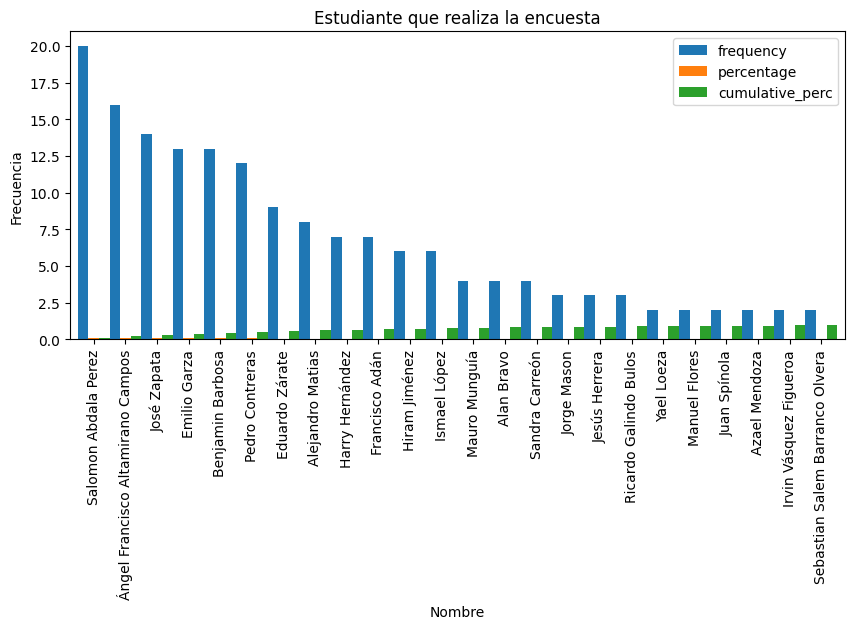

In [100]:
# Empieza el proceso de gráficas
Filtro1.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Estudiante que realiza la encuesta')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

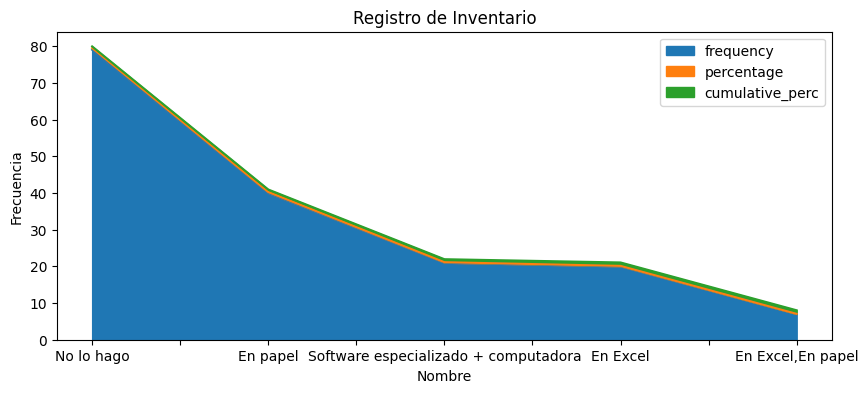

In [104]:
Filtro2.plot(kind = 'area', figsize=(10,4))
plt.title('Registro de Inventario')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

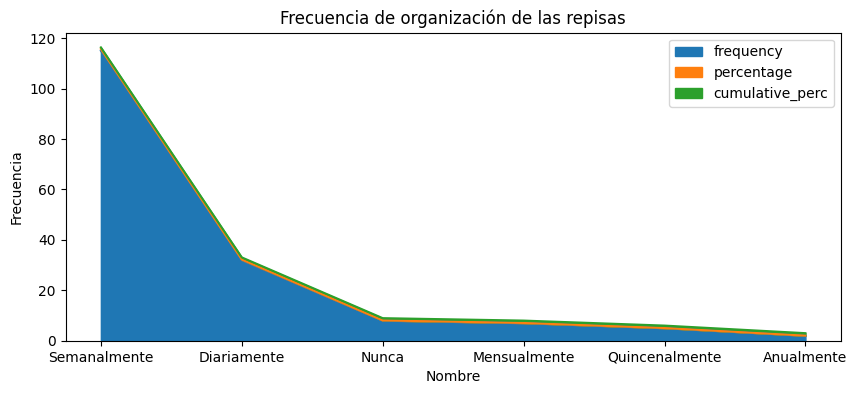

In [106]:
Filtro3.plot(kind = 'area', figsize=(10,4))
plt.title('Frecuencia de organización de las repisas')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

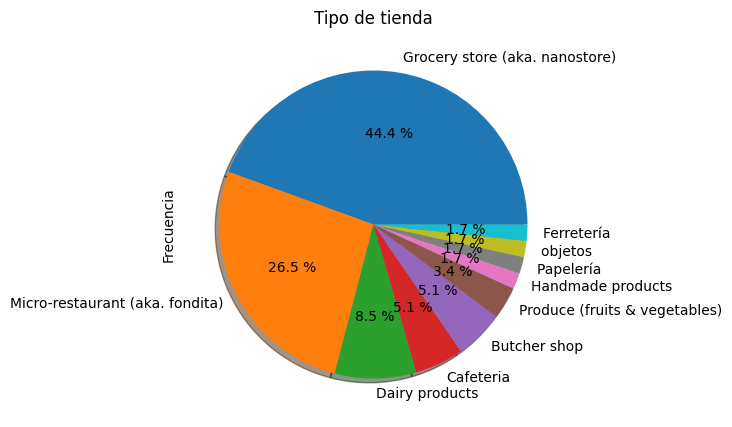

In [109]:
Filtro4["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Tipo de tienda')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

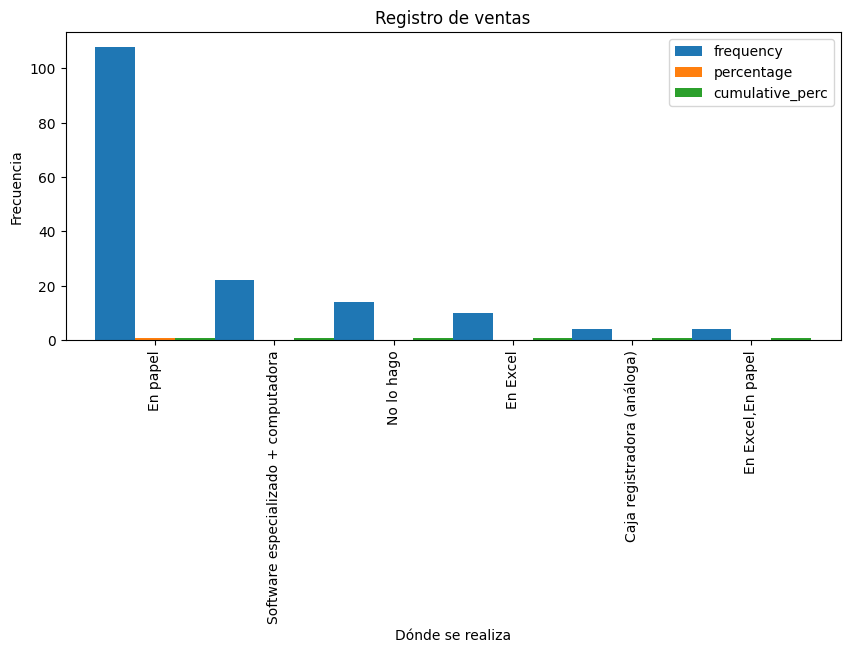

In [116]:
Filtro5.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Registro de ventas')
plt.xlabel('Dónde se realiza')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

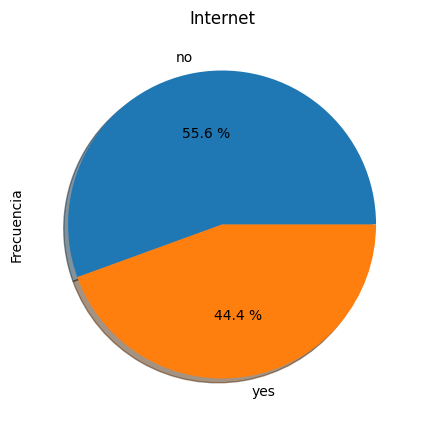

In [117]:
Filtro6["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Internet')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

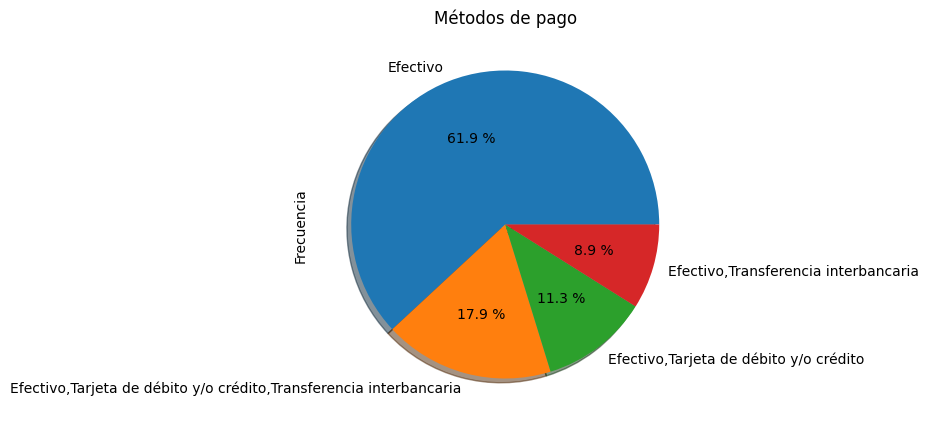

In [124]:
Filtro7["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Métodos de pago')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

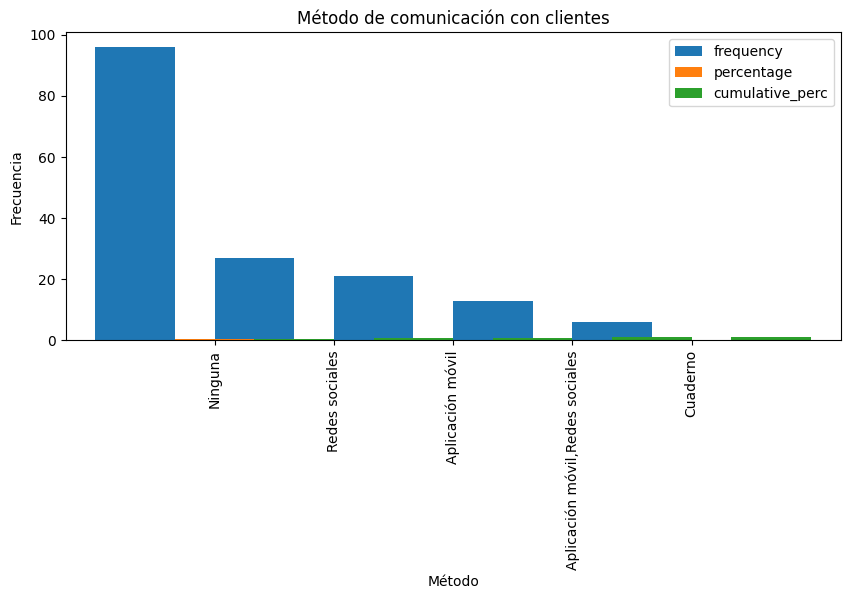

In [122]:
Filtro8.plot(kind = 'bar', width=2, figsize=(10,4))
plt.title('Método de comunicación con clientes')
plt.xlabel('Método')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

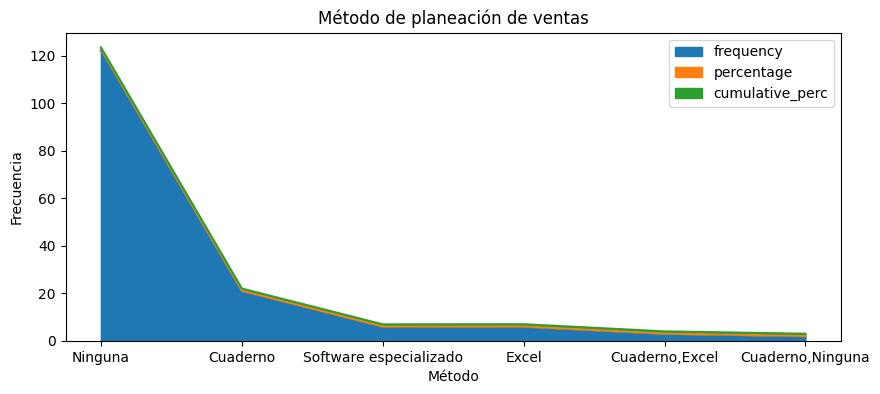

In [125]:
Filtro9.plot(kind = 'area', figsize=(10,4))
plt.title('Método de planeación de ventas')
plt.xlabel('Método')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

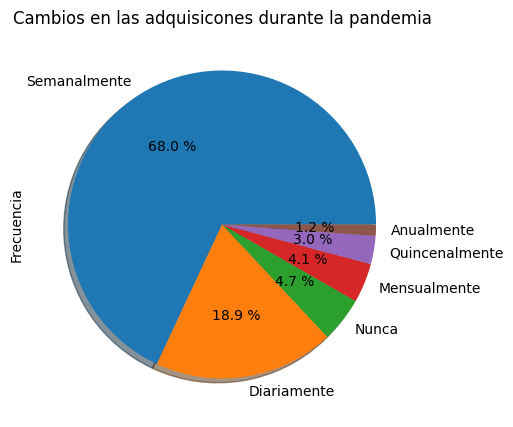

In [129]:
Filtro10["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Cambios en las adquisicones durante la pandemia')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

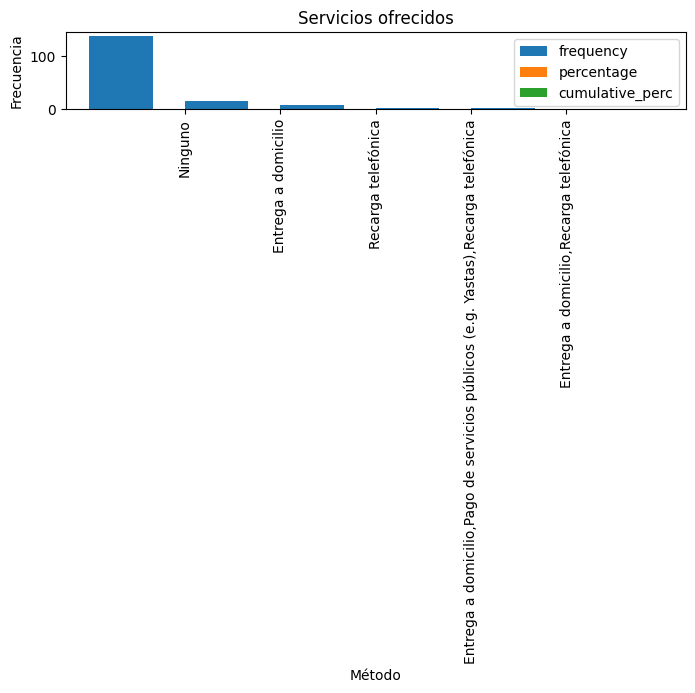

In [168]:
Filtro11.plot(kind = 'bar', width=2, figsize=(8,1))
plt.title('Servicios ofrecidos')
plt.xlabel('Método')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

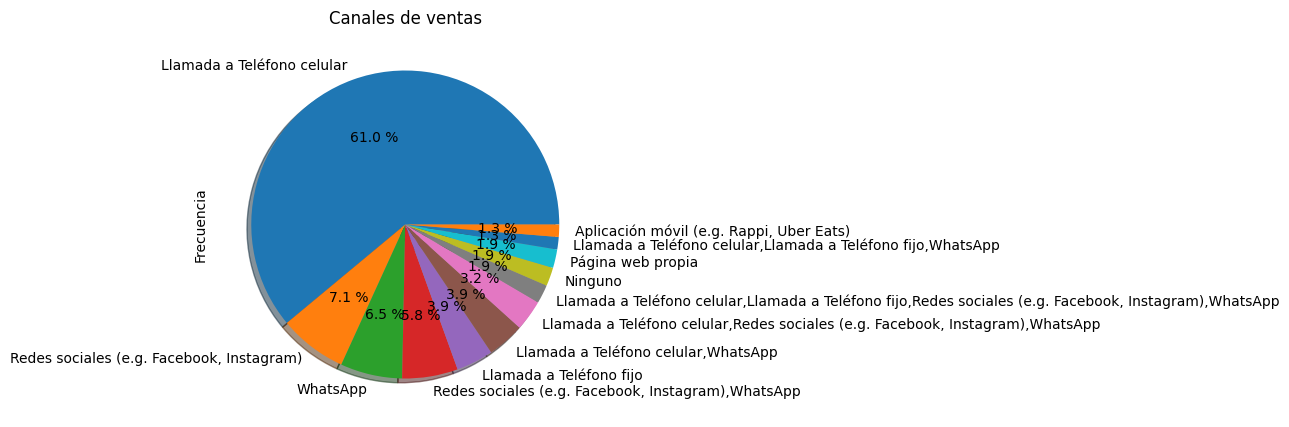

In [137]:
Filtro12["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Canales de ventas')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

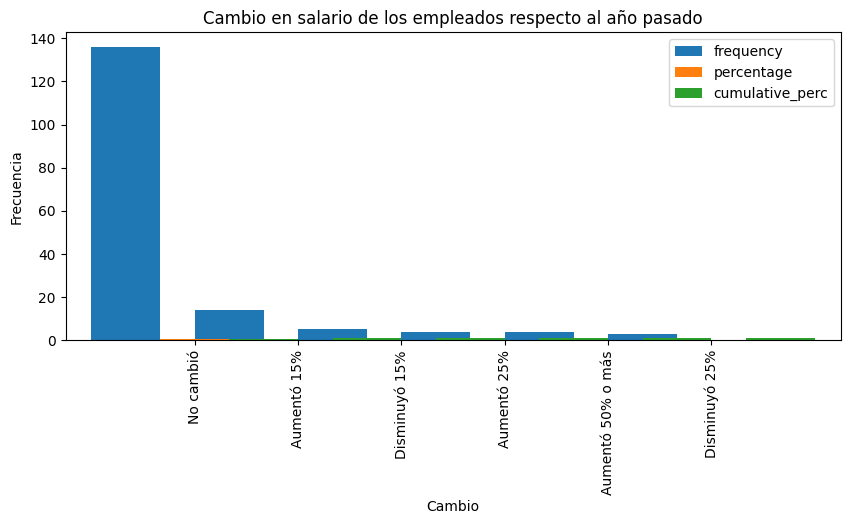

In [141]:
Filtro13.plot(kind = 'bar', width=2, figsize=(10,4))
plt.title('Cambio en salario de los empleados respecto al año pasado')
plt.xlabel('Cambio')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

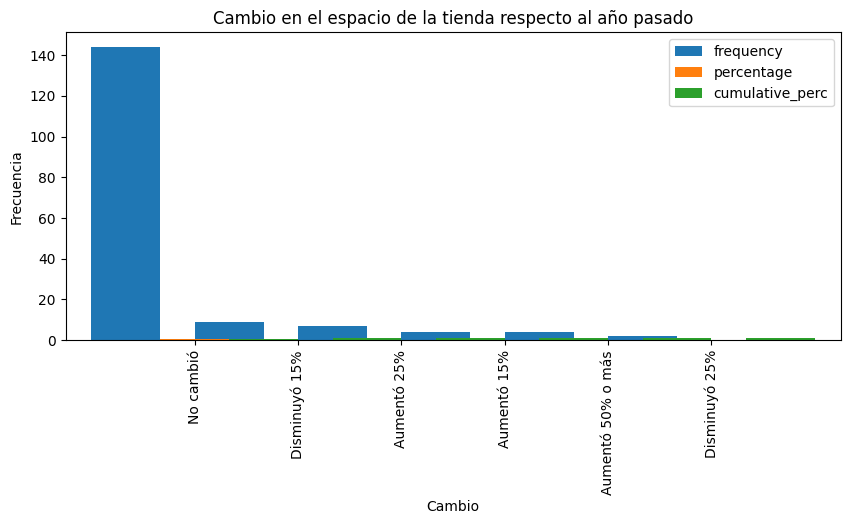

In [142]:
Filtro14.plot(kind = 'bar', width=2, figsize=(10,4))
plt.title('Cambio en el espacio de la tienda respecto al año pasado')
plt.xlabel('Cambio')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

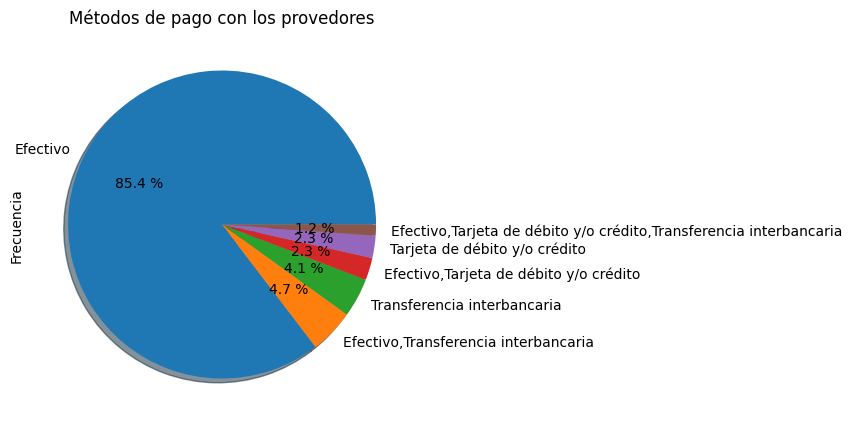

In [143]:
Filtro15["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Métodos de pago con los provedores')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

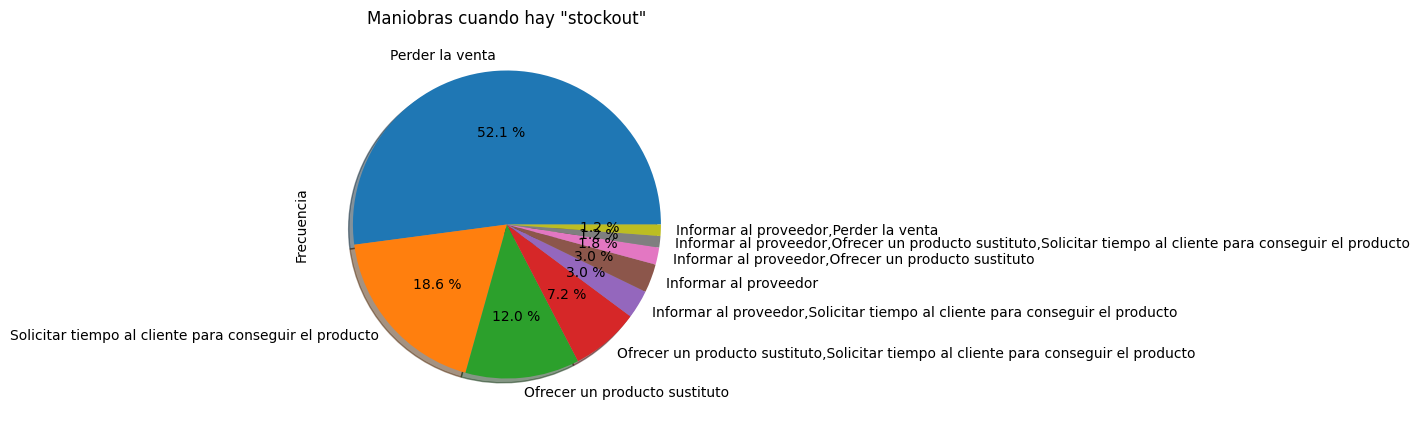

In [144]:
Filtro16["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Maniobras cuando hay "stockout"')
plt.ylabel('Frecuencia')